<a href="https://colab.research.google.com/github/nestorjuarezR/Data_Science/blob/main/playlist_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
pip install spotipy --upgrade

Requirement already up-to-date: spotipy in /usr/local/lib/python3.6/dist-packages (2.16.1)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import spotipy 
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings('ignore')

# Conexión a Spotify

In [3]:
auth_manager = SpotifyClientCredentials(client_id='tu_id',
                                        client_secret='tu_secret')

In [4]:
sp = spotipy.Spotify(auth_manager=auth_manager)
playlist_info = 'spotify:playlist:64wCfuQ6rbIVvw0oo1AcFQ'    #Defino la playlista 

In [5]:
playlist = sp.playlist(playlist_info)

In [6]:
#Obtengo un listado con el ID de cada cancion en la playlist

track_ids = []

for item in playlist['tracks']['items']:
  track = item['track']
  track_ids.append(track['id'])

In [7]:
#Obtengo datos de interes de cada cancion

info = []

for i in track_ids:
  track_info = sp.track(i)
  feature_info = sp.audio_features(i)

  #Informacion de la cancion
  name = track_info['name']
  album = track_info['album']['name']
  artist = track_info['album']['artists'][0]['name']
  release_date = track_info['album']['release_date']
  length = track_info['duration_ms']
  popularity = track_info['popularity']
  link = track_info['external_urls']

  #Analisis de la cancion
  id = feature_info[0]['id']
  acousticness = feature_info[0]['acousticness']
  danceability = feature_info[0]['danceability']
  energy = feature_info[0]['energy']
  liveness = feature_info[0]['liveness']
  loudness = feature_info[0]['loudness']
  speechiness = feature_info[0]['speechiness']

  final_info = [id, name, album, artist, release_date, length, popularity,
                 link, acousticness, danceability, energy, liveness, loudness, speechiness]

  info.append(final_info)                 
  

In [8]:
#Convierto a DataFrame
data = pd.DataFrame(info, columns=['id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity',
                 'link', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness'])

#Análisis

In [9]:
data.head(2)

,id,name,album,artist,release_date,length,popularity,link,acousticness,danceability,energy,liveness,loudness,speechiness
0,5fLOkcGJ6fGNyOGPlG07cK,Culpable Tu,Culpable Tu,Alta Consigna,2016-08-08,231760,0,{'spotify': 'https://open.spotify.com/track/5f...,0.675,0.508,0.361,0.147,-7.538,0.0286
1,658OMPqTG1ASncKCnhsGOl,Así Quería Mirarte,Así Quería Mirarte,Jovanny Cadena Y Su Estilo Privado,2018-10-26,217283,0,{'spotify': 'https://open.spotify.com/track/65...,0.692,0.706,0.695,0.130,-2.922,0.0316


Text(0.5, 1.0, 'Artista por Frecuencia de aparicion')

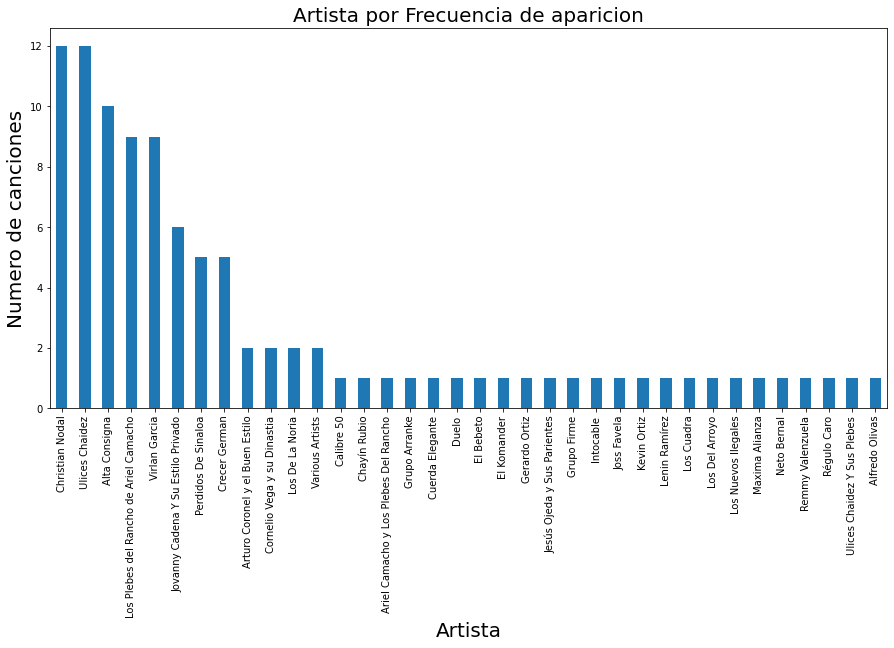

In [10]:
fig = plt.figure(figsize = (15,7))
data.groupby('artist')['name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artista', fontsize = 20)
plt.ylabel('Numero de canciones', fontsize = 20)
plt.title('Artista por Frecuencia de aparicion', fontsize = 20)

Text(0.5, 1.0, 'Popularidad de Canciones')

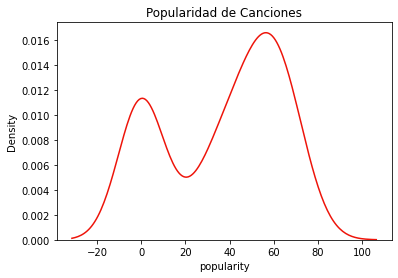

In [11]:
sns.kdeplot(data['popularity'],
            color='#EE140A')
plt.title('Popularidad de Canciones')

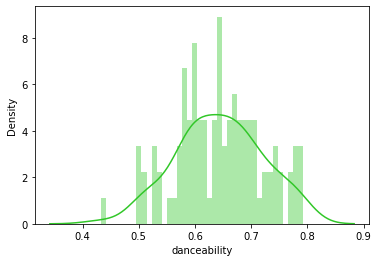

In [12]:
sns.distplot(data.danceability,
             bins=40,
             color='#31C728')

Text(0.5, 1.0, 'Loudness de Canciones')

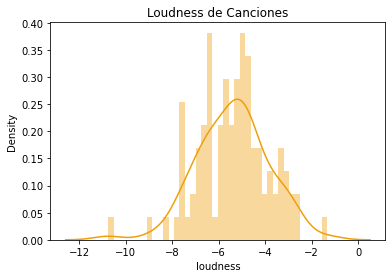

In [13]:
sns.distplot(data.loudness,
             bins=40,
             color='#EE9F0A')
plt.title('Loudness de Canciones')

In [14]:
#Artistas con canciones más bailables
by_danceability = pd.DataFrame(data.groupby('artist')['danceability'].mean())
by_danceability.sort_values(by=['danceability'], ascending=False).head(5)

,danceability
artist,
Calibre 50,0.775
Ariel Camacho y Los Plebes Del Rancho,0.751
Joss Favela,0.741
Kevin Ortiz,0.720
Intocable,0.704


In [15]:
#Artistas con mas energia en sus canciones
by_energy = pd.DataFrame(data.groupby('artist')['energy'].mean())
by_energy.sort_values(by=['energy'], ascending=False).head(5)

,energy
artist,
Cornelio Vega y su Dinastia,0.748
Grupo Arranke,0.695
Intocable,0.671
Alfredo Olivas,0.669
Remmy Valenzuela,0.645


In [16]:
#Artistas mas populares
by_popularity = pd.DataFrame(data.groupby('artist')['popularity'].mean())
by_popularity.sort_values(by=['popularity'], ascending=False).head(5)

,popularity
artist,
Chayín Rubio,72.0
El Bebeto,68.0
Grupo Arranke,68.0
Calibre 50,67.0
Alfredo Olivas,66.0


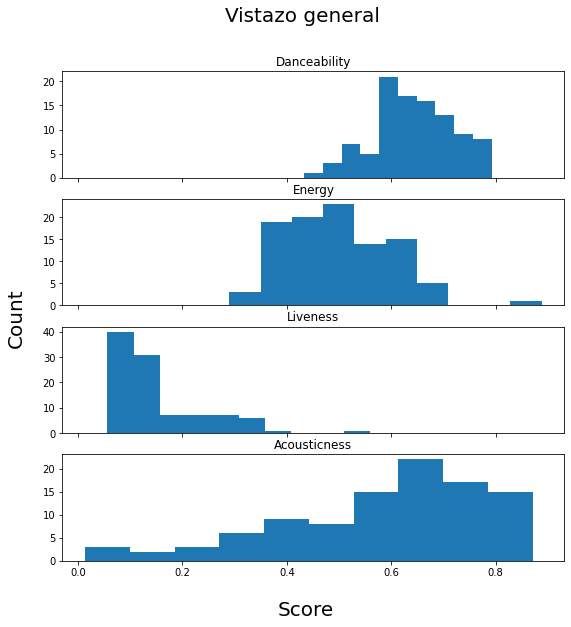

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Score', ha='center',size=20)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',size=20)
axs[0].hist(data['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(data['energy'])
axs[1].set_title('Energy')
axs[2].hist(data['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(data['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle('Vistazo general ',size=20)
plt.show()

Text(0.5, 1.0, 'Relación energy y loudness')

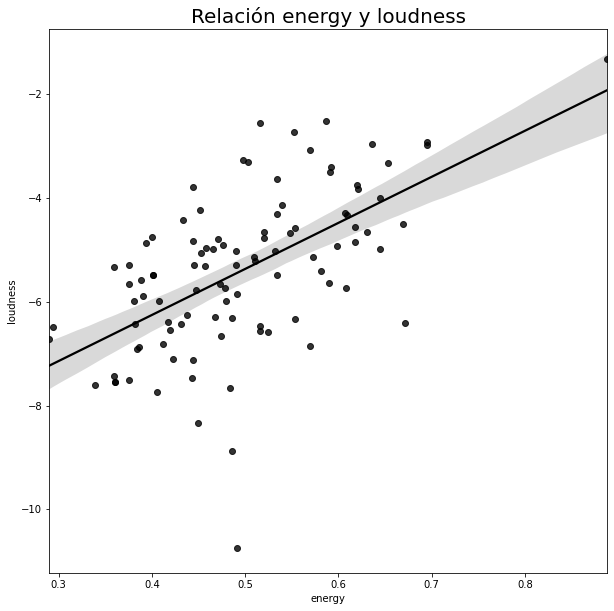

In [18]:
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='energy',
            y='loudness',
            data=data,color='black')
plt.title('Relación energy y loudness',fontsize = 20)

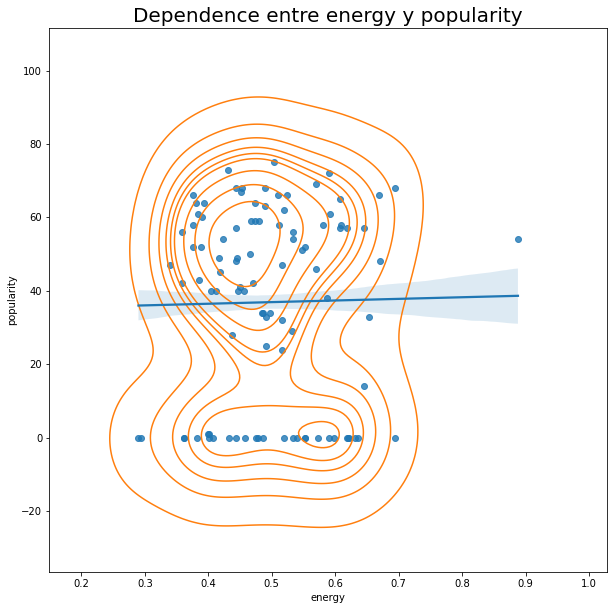

In [19]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence entre energy y popularity', fontsize=20)
sns.regplot(x='energy', y='popularity',
            ci=50, data=data, )
sns.kdeplot(data.energy,data.popularity)

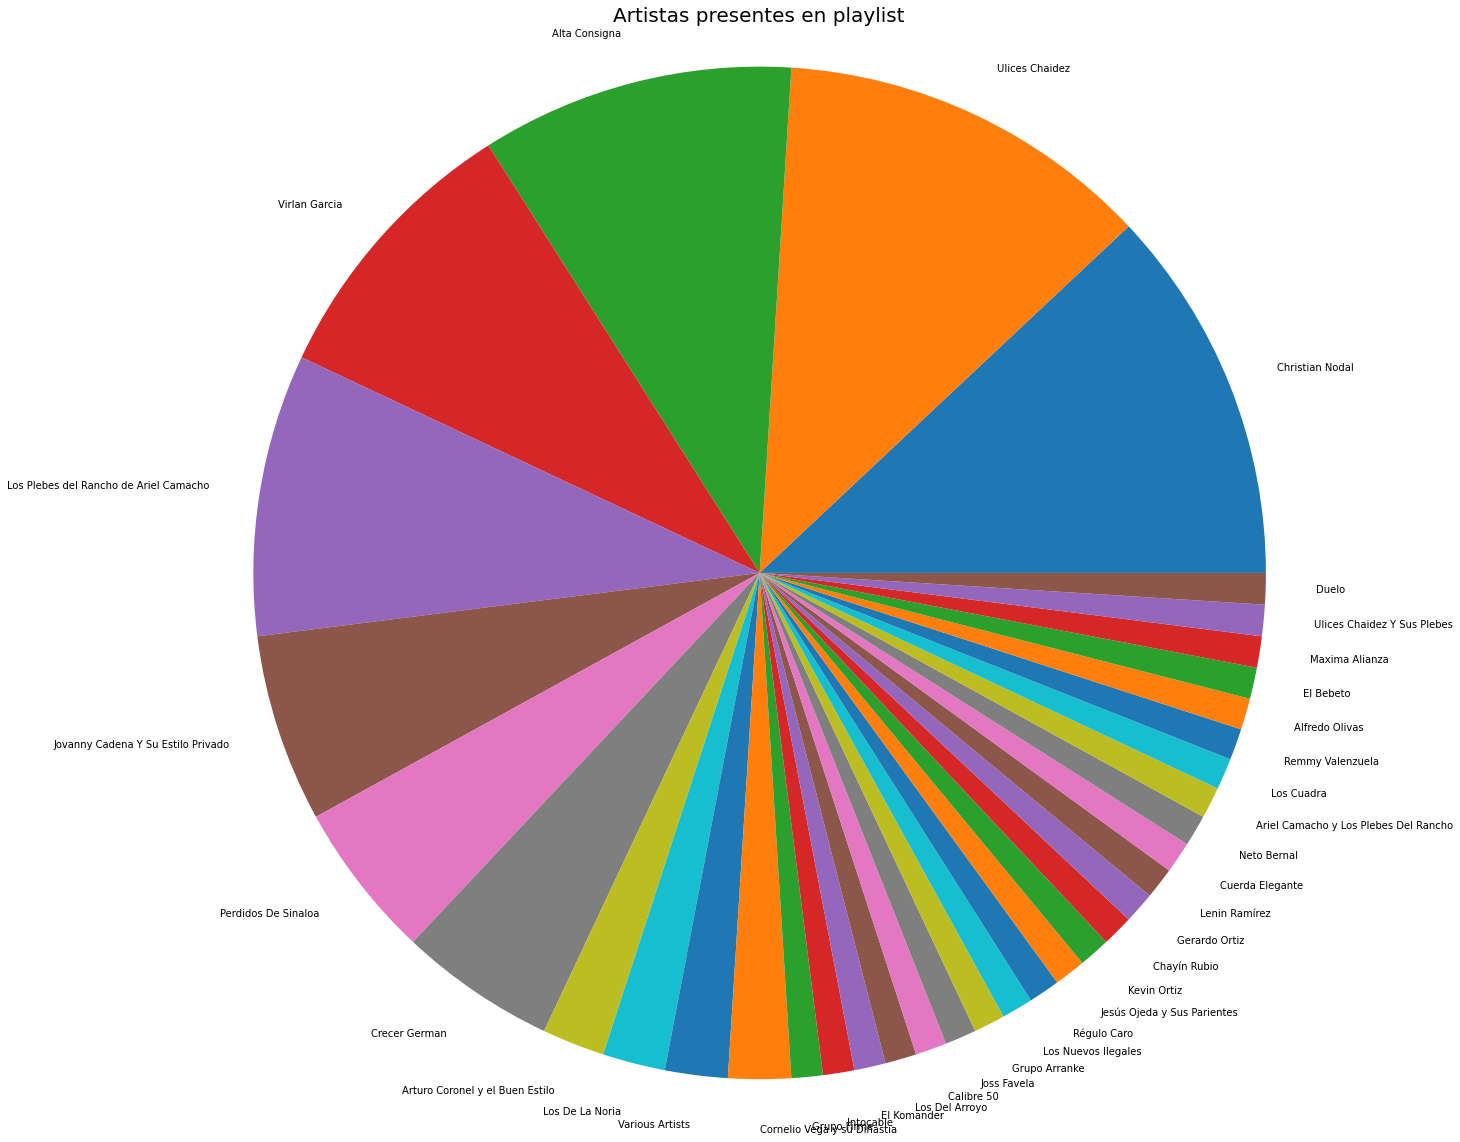

In [20]:
labels = data.artist.value_counts().index
sizes = data.artist.value_counts().values
plt.figure(figsize = (20,20))
plt.pie(sizes, labels=labels)
autopct=('%1.1f%%')
plt.axis('equal')
plt.title('Artistas presentes en playlist', fontsize=20)
plt.show()